<a href="https://colab.research.google.com/github/devink07/deep-learning-UoC/blob/main/Deep_Learning_Collab_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up your environment
In order to use Colab with the required NN libarries we need to install iany that are not available by default on to your cloud instance 

In [ ]:
# import the libraries we will be using for our workshop 
# standard data science libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Using Sci-kit learn to do the preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#Tensorflow
import tensorflow as tf
from keras.utils.vis_utils import plot_model


import plotly.express as px
import plotly.graph_objects as go

#interactive display of data
%load_ext google.colab.data_table

# Example 1: Simple linear function
Using a basic neural network let us try and approximate a function which converts degrees Celsius to Fahrenheit




## 1.1 Define the real world function
In reality, we won't have access to this function. But just for the sake of the experiment we will be using this 

In [ ]:
def celsius_to_F(celsius):

  Fahrenheit  = 1.8*celsius+32

  return Fahrenheit

## 1.2. Extract the data

In [ ]:
celsius_array = np.array([1,2,3,4,5,6,7,8])
Fahrenheit_array = celsius_to_F(celsius_array)

## 1.3 Build model using tensorflow's keras wrapper
The Keras wrapper helps users to define models easily 

In [ ]:
# Sequential means the layers can be stacked, we only have one layer 
# Input dimension is the 'columns' of input data, again we have only one 
# Dense layers are used when association can exist among any feature to any other feature in data point. i.e. fully connected

model = tf.keras.Sequential(
                            [tf.keras.layers.Dense(1,input_shape=[1]) 
        ])

In [ ]:
# model gets compiled we have specifed the loss function and the optimizer
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
              )


In [ ]:
# fit the model
# celsius_array (x) and farhenheit_array (y) are put as arguments
# epochs mean number of times it goes through the training set, in this case it will make 500 passes through the training set
history = model.fit(celsius_array,farhenheit_array,epochs=500,verbose=False)

Text(0, 0.5, 'Loss Magnitude')

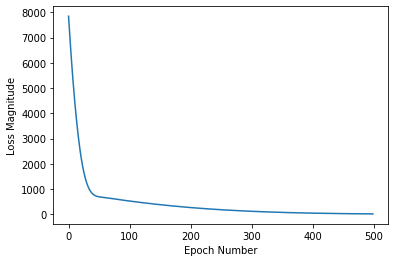

In [ ]:
# Plot the improvevment of loss (difference in y and y_pred)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')

In [ ]:
print(model.predict([100.0]))

[[212.60281]]


In [ ]:
# examine the weights and bias. 
# as seen below, the two metrics are very close to the values in the function
model.get_weights()

[array([[1.8262619]], dtype=float32), array([29.976622], dtype=float32)]

In [ ]:
# to get number of parameters it is n[l],n[l-1] add the bias terms of current layer
# WHAT DOES THE ABOVE MEAN?
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


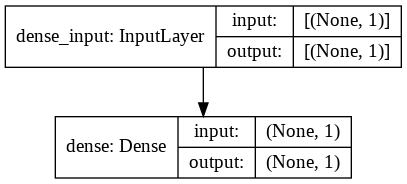

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,expand_nested=True)

# Activation Functions


## Sigmoid Function


In [ ]:
def sigmoid(x):
  s = 1/(1+np.exp(-x))
  return s

In [ ]:
x = np.linspace(-10,10,num =100)

In [ ]:
y = sigmoid(x)

In [ ]:
y_prime = sigmoid(x) * (1-sigmoid(x))

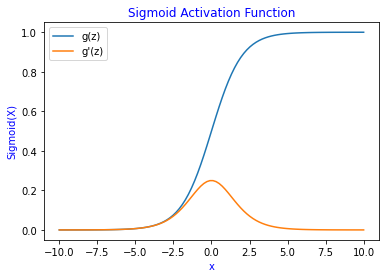

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
plt.plot(x,y,label = 'g(z)')
plt.plot(x,y_prime, label = "g'(z)")
plt.title('Sigmoid Activation Function',color = 'blue')
plt.xlabel("x",color = 'blue')
plt.ylabel("Sigmoid(X)",color = 'blue')
plt.legend()
plt.show()

## Tanh function

In [ ]:
def tanh(x):
  z = (np.exp(x) - np.exp(-x))/(np.exp(x)+np.exp(-x))
  return z

In [ ]:
x = np.linspace(-4,4,num=100)
y_tanh = tanh(x)
y_prime_tanh = 1- (tanh(x)**2)

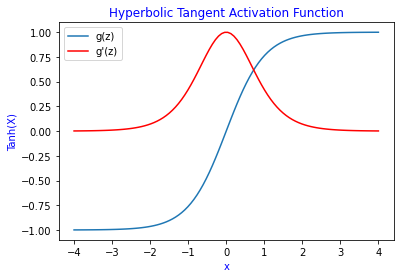

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
plt.plot(x,y_tanh,label = 'g(z)')
plt.plot(x,y_prime_tanh, label = "g'(z)",color = 'red')
plt.title('Hyperbolic Tangent Activation Function',color = 'blue')
plt.xlabel("x",color = 'blue')
plt.ylabel("Tanh(X)",color = 'blue')
plt.legend()
plt.show()

## ReLU function


In [ ]:
def relu(x):
  s = max(0,x)
  return s


In [ ]:
x = np.linspace(-4,4,num=100)
y_relu = [relu(i) for i in x]
Y_prime_relu = np.where(x>0,1,0)

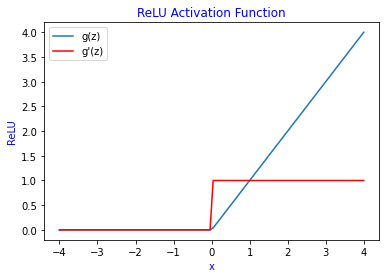

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
plt.plot(x,y_relu,label = 'g(z)')
plt.plot(x,Y_prime_relu, label = "g'(z)",color = 'red')
plt.title('ReLU Activation Function',color = 'blue')
plt.xlabel("x",color = 'blue')
plt.ylabel("ReLU",color = 'blue')
plt.legend()
plt.show()

## Leaky Relu 

In [ ]:
def leaky_relu(alpha ,x):
  s = max(alpha*x,x)
  return s

In [ ]:
alpha = 0.01
x = np.linspace(-4,4,num=100)
y_leaky_relu = [leaky_relu(alpha,i) for i in x]
Y_prime_leaky_relu = np.where(x>0,1,alpha)

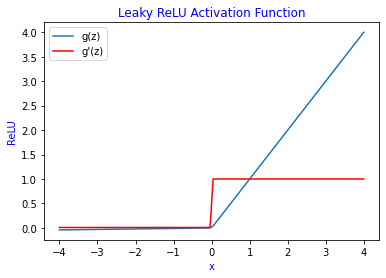

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
plt.plot(x,y_leaky_relu,label = 'g(z)')
plt.plot(x,Y_prime_leaky_relu, label = "g'(z)",color = 'red')
plt.title('Leaky ReLU Activation Function',color = 'blue')
plt.xlabel("x",color = 'blue')
plt.ylabel("ReLU",color = 'blue')

plt.legend()
plt.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y_leaky_relu,
                    mode='lines',
                    name='g(z)'))
fig.add_trace(go.Scatter(x=x, y=Y_prime_leaky_relu,
                    mode='lines',
                    name="g'(z)"))
fig.update_layout(title='Leaky ReLU Activation Funtion',
                   xaxis_title='ReLU',
                   yaxis_title='x')

fig.show()

# Sample Loss Functions

## Mean Squared Error

$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \widehat{y_{i}})^{2}$

In [ ]:
y_i = np.array([10,23,31,45,51])
y_i_hat = np.array([10,30,40,60,80])


In [ ]:
sum((y_i-y_i_hat)**2)/len(y_i)

239.2

* When the values are not close to the true y (ground truth values) we can see that the MSE is high

In [ ]:
y_i_hat_2 = np.array([10,20.5,30,43.25,52.25])
sum((y_i-y_i_hat_2)**2)/len(y_i)

2.375

* When the values are close close to the true y (ground truth values) we can see that the MSE is low

## Cross Entropy
$Cross \ entropy = -\frac{1}{n}\sum_{i=1}^{n}(y_{i}log(\widehat{y_{i}}))$



In [ ]:
# cross entropy examples
#correct prediction
y = np.array([0,0,1,1])
y_hat = np.array([0.1,0.1,0.7,0.9])
cross_entropy =-np.sum(y*np.log(y_hat))/len(y)
print(f'Cross Entropy is {cross_entropy}')

Cross Entropy is 0.11550886489913968


* We can see when the values are close to each other, the entropy is low

In [ ]:
#incorrect prediction
y_hat_inc = np.array([0.9,0.9,0.2,0.1])
cross_entropy =-np.sum(y*np.log(y_hat_inc))/len(y)
print(f'Cross Entropy is {cross_entropy}')

Cross Entropy is 0.9780057513570364


* We can see when the values are far apart from each other, the entropy is high

# Example 2: Training on a Multi-variate data set


## 2.1 Loading the dataset

> Devin can you take the IRIS and do EDA?



In [ ]:
#reading the file
path = tf.keras.utils.get_file('Real_estate_valuation.csv', 
                               'https://drive.google.com/uc?id=1MJXqTZeEfsAQqm_ff9qTfZNUpFLfOjvg' )
print (path)


16384/13903 [===================================] - 0s 0us/step
/root/.keras/datasets/Real_estate_valuation.csv


In [ ]:
data = pd.read_csv('/root/.keras/datasets/Real_estate_valuation.csv')

In [ ]:
#visualizing the first 5 rows of the data
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,37.9
1,2,2012.917,19.5,306.59470,9,42.2
2,3,2013.583,13.3,561.98450,5,47.3
3,4,2013.500,13.3,561.98450,5,54.8
4,5,2012.833,5.0,390.56840,5,43.1


In [ ]:
# best practice is to always work on a copy, we set deep equal true, any changes made on the copy will not affect the original data set
real_estate = data.copy(deep=True)

## Data Definitions
The inputs are as follows
* X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* X2=the house age (unit: year)
* X3=the distance to the nearest MRT station (unit: meter)
* X4=the number of convenience stores in the living circle on foot (integer)


The output is as follows
* Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)


In [ ]:
# it shows that type of the data
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 19.5 KB


In [ ]:
real_estate.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
Y house price of unit area                0
dtype: int64

In [ ]:
#dropping the number column, pandas indexing takes care of it
real_estate.drop(['No'],axis=1,inplace=True)

In [ ]:
real_estate.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [ ]:
# getting the unique value counts for each column
for col in real_estate.columns.values:
  print(f'-------------------{col}------------------------')
  print(real_estate[col].value_counts())

## EDA 

We look at the descriptive statistics to see if we can get clues on how the data is strucutred

In [ ]:
#summary statistics for the data set
real_estate.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,37.980193
std,0.281967,11.392485,1262.109595,2.945562,13.606488
min,2012.667000,0.000000,23.382840,0.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,117.500000


Text(0, 0.5, 'House Price (NTD)')

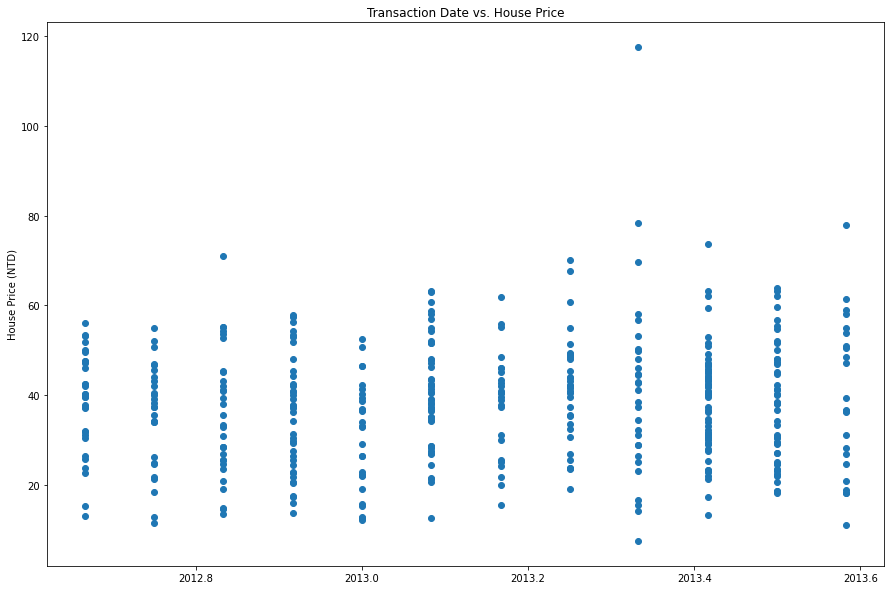

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(real_estate['X1 transaction date'],data['Y house price of unit area'])
plt.title('Transaction Date vs. House Price')
plt.ylabel('House Price (NTD)')

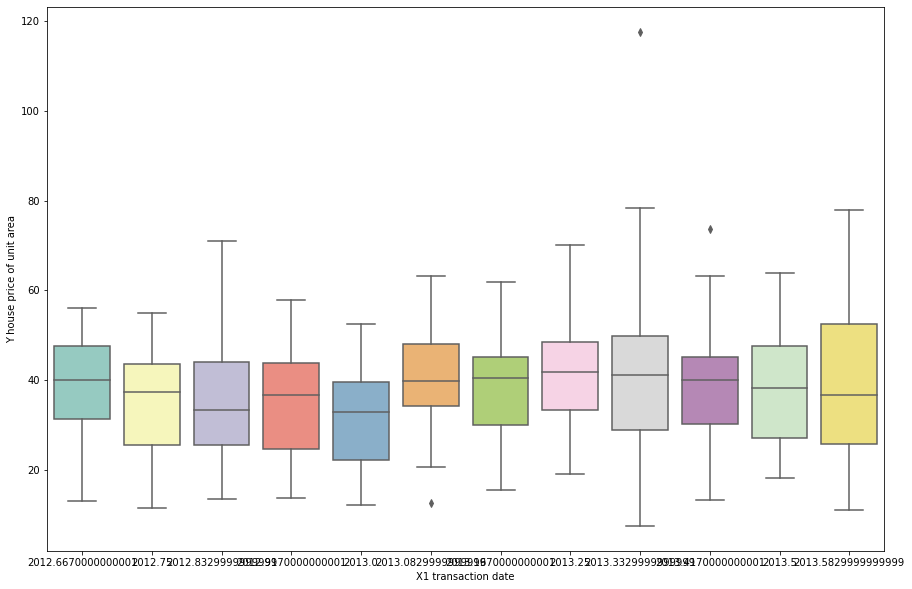

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="X1 transaction date", y="Y house price of unit area",
                 data=real_estate, palette="Set3")


Text(0, 0.5, 'House Price (NTD)')

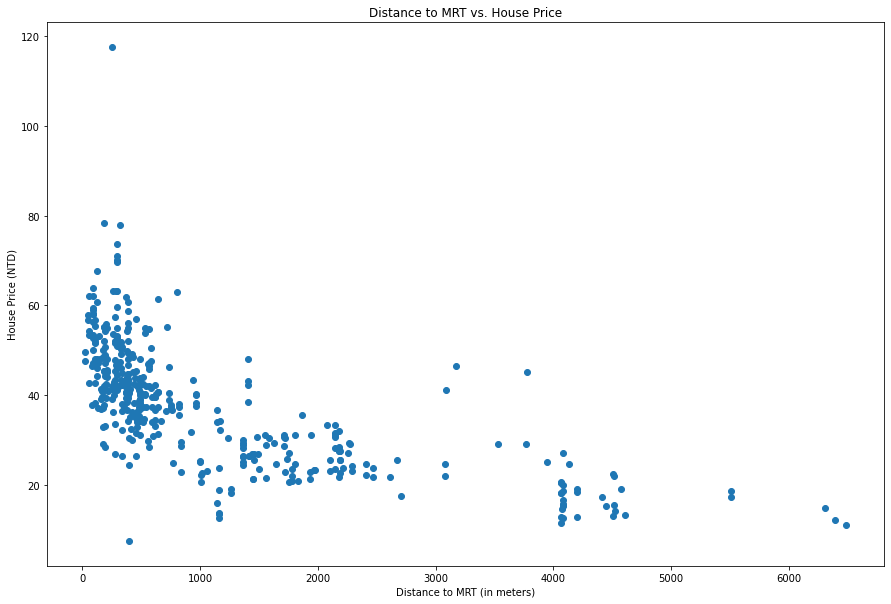

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(real_estate['X3 distance to the nearest MRT station'],data['Y house price of unit area'])
plt.title('Distance to MRT vs. House Price')
plt.xlabel('Distance to MRT (in meters)')
plt.ylabel('House Price (NTD)')

Text(0, 0.5, 'House Price (NTD)')

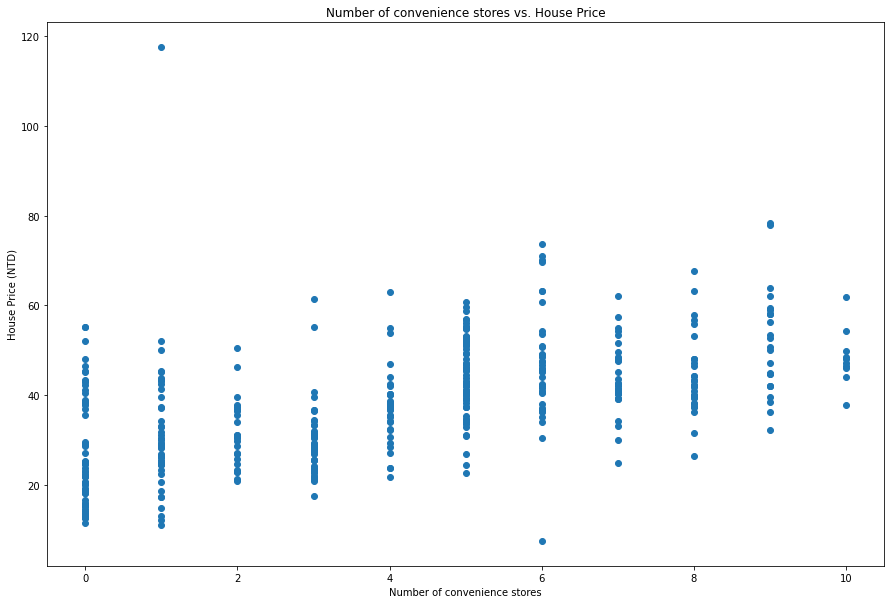

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(real_estate['X4 number of convenience stores'],data['Y house price of unit area'])
plt.title('Number of convenience stores vs. House Price')
plt.xlabel('Number of convenience stores')
plt.ylabel('House Price (NTD)')

Text(0, 0.5, 'House Price (NTD)')

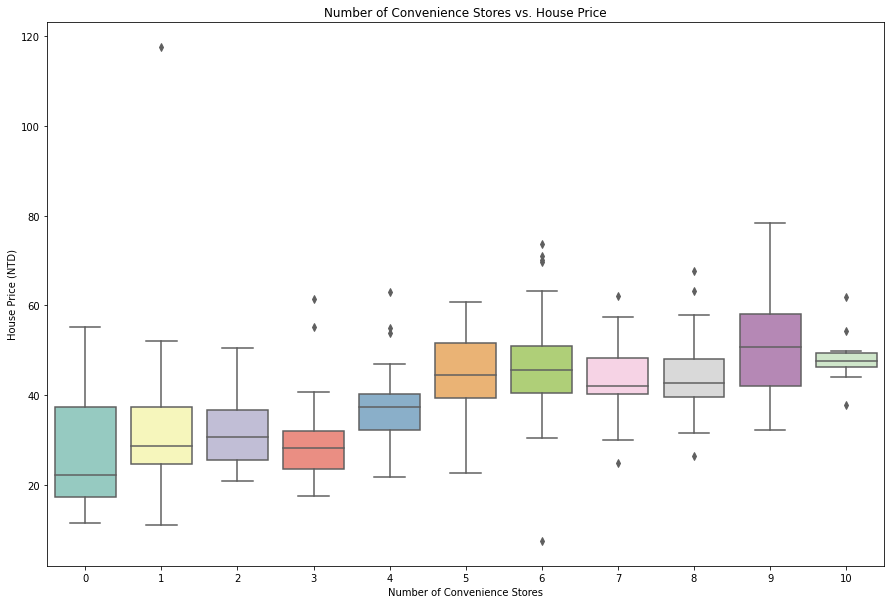

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="X4 number of convenience stores", y="Y house price of unit area",
                 data=real_estate, palette="Set3")
plt.title('Number of Convenience Stores vs. House Price')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('House Price (NTD)')

Text(0, 0.5, 'House Price (NTD)')

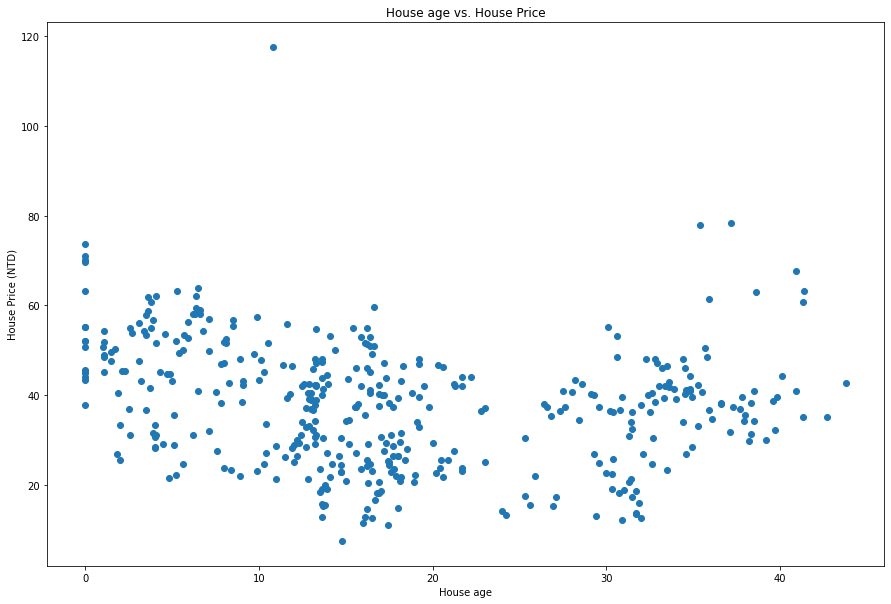

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(real_estate['X2 house age'],data['Y house price of unit area'])
plt.title('House age vs. House Price')
plt.xlabel('House age')
plt.ylabel('House Price (NTD)')

In [ ]:
 real_estate.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'Y house price of unit area'],
      dtype='object')

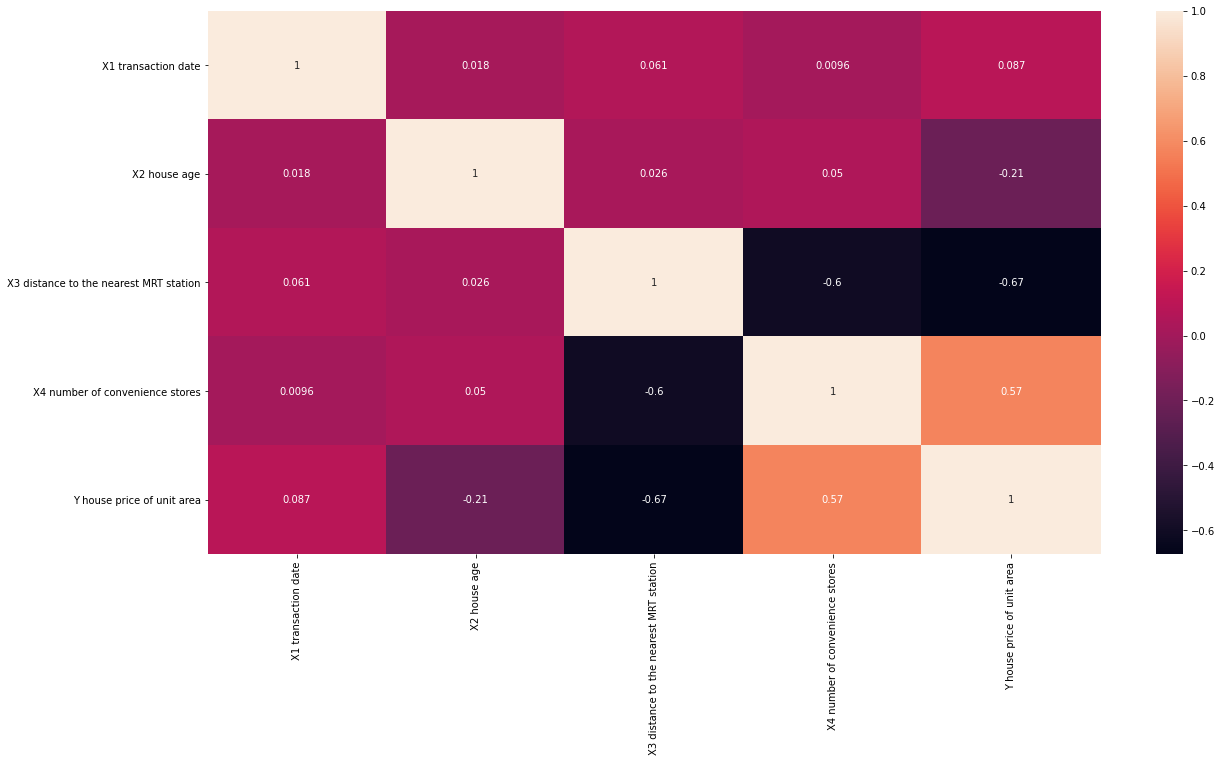

In [ ]:
corr = real_estate.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
real_estate.shape

(414, 5)

In [ ]:
#splitting into training and testing data
x = np.array(real_estate.iloc[:,:-1])
y = np.array(real_estate.iloc[:,-1])[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=False) # do we want to shuffle the data

In [ ]:
print(f' Training Data: {len(X_train),len(y_train)}, Testing Data: {len(X_test),len(y_test)}')

 Training Data: (331, 331), Testing Data: (83, 83)


In [ ]:
"""
We transform the data using the training data, we do not use the whole data set;
This is to avoid any data leakage
If we use the whole dataset, the information will leak as we will be calculating
the minimum and maximum using all the data. At deployment or 
"""
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(X_train)


In [ ]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))

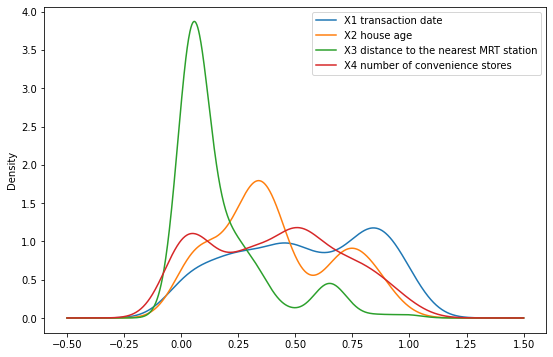

In [ ]:
pd.DataFrame(x_train_scaled,columns=real_estate.columns[:-1]).plot.kde(figsize=(9,6))

* 

## 2.2 Build the Model
Let's start by building a multi-layer model by initating the parameters:
1. Input size (i.e. how many columns of data? 4
2. Output size how many columns of Output data? 1
3. How many layers? 1 input + 2 hidden + 1 output layer
4. What activation do I use? None specific, let's go with 2 relu's _ SGD for output layer   

### Model 25

In [ ]:
# sequential means that the layers are 'stacked'
no_neuron = 100
tf.random.set_seed(7) # ensure weights are set
model = tf.keras.Sequential([
                    tf.keras.layers.Dense(no_neuron,activation='relu',input_dim=4,),
                    #tf.keras.layers.Dense(5,activation='relu'),
                    tf.keras.layers.Dense(1)
                    


])



In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


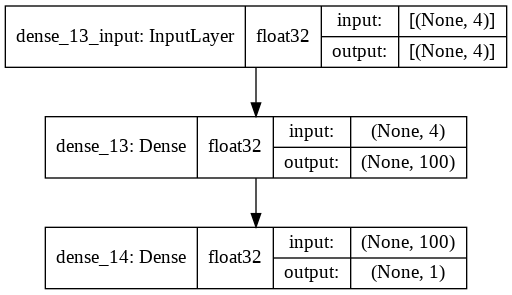

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96
)


In [ ]:
tf.keras.losses.MeanSquaredError

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics = [tf.keras.metrics.MeanSquaredError()])

In [ ]:
history = model.fit(x_train_scaled,y_train_scaled,epochs=30,validation_split=0.2,
                    batch_size=10,verbose=0) # verbose = 0,1,2

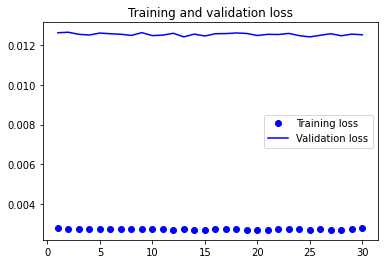

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
train_rmse = history.history['root_mean_squared_error']
val_loss = history.history['val_root_mean_squared_error']
epochs = range(1, len(loss) + 1)


plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation RMSE')
plt.legend()
plt.show()

KeyError: ignored

In [ ]:
#getting the model layers
for lay in model.layers:
  print(lay.name)
  print(lay.get_weights())
  

# Prediction using the test data
* In order to get predicted value from our model, we need to pass in our scaled testing data into the predict method of the model

* The data must be transformed using the parameters from the training data, this is to ensure there is no data leakage

In [ ]:
x_test_transform = x_scaler.transform(X_test)

In [ ]:
predict = model.predict(x_test_transform)

In [ ]:
len(predict)

83

In [ ]:
predict.shape

(83, 1)

In [ ]:
predict.min()

0.050163746

In [ ]:
y_test.min()

11.2

In [ ]:
# we need to remove the transformation on the predicted data
y_predict = y_scaler.inverse_transform(predict)


In [ ]:
y_test[:,0]

array([15.6, 39.6, 38.4, 22.8, 36.5, 35.6, 30.9, 36.3, 50.4, 42.9, 37. ,
       53.5, 46.6, 41.2, 37.9, 30.8, 11.2, 53.7, 47. , 42.3, 28.6, 25.7,
       31.3, 30.1, 60.7, 45.3, 44.9, 45.1, 24.7, 47.1, 63.3, 40. , 48. ,
       33.1, 29.5, 24.8, 20.9, 43.1, 22.8, 42.1, 51.7, 41.5, 52.2, 49.5,
       23.8, 30.5, 56.8, 37.4, 69.7, 53.3, 47.3, 29.3, 40.3, 12.9, 46.6,
       55.3, 25.6, 27.3, 67.7, 38.6, 31.3, 35.3, 40.3, 24.7, 42.5, 31.9,
       32.2, 23. , 37.3, 35.5, 27.7, 28.5, 39.7, 41.2, 37.2, 40.5, 22.3,
       28.1, 15.4, 50. , 40.6, 52.5, 63.9])

In [ ]:
predict_df = pd.DataFrame({'True_Y':y_test[:,0],
                           'Predict_Y':y_predict[:,0]
},index=real_estate.iloc[331:,1].index.values)

In [ ]:
predict_df

,True_Y,Predict_Y
331,15.6,14.371608
332,39.6,33.165295
333,38.4,46.023743
334,22.8,36.206417
335,36.5,41.349609
...,...,...
409,15.4,14.605176
410,50.0,54.668961
411,40.6,43.337902
412,52.5,46.301262


In [ ]:
predict_df.max()

True_Y       69.700000
Predict_Y    59.347778
dtype: float64

In [ ]:
y_test.shape

(83, 1)

In [ ]:
#calculating RMSE
np.sqrt(sum(np.square(y_test - y_predict))/len(X_test))

array([7.39537089])

In [ ]:
#Calculating MSE
sum(np.square(y_test - y_predict))/len(X_test)

array([54.69151063])

In [ ]:
from sklearn.metrics import mean_squared_error
print(f'MSE : {mean_squared_error(y_test, y_predict)} , RMSE : {mean_squared_error(y_test, y_predict,squared=False)}' )

MSE : 54.691510626748176 , RMSE : 7.395370891763859


Text(409, 69, 'MSE : 54.69 \nRMSE : 7.40')

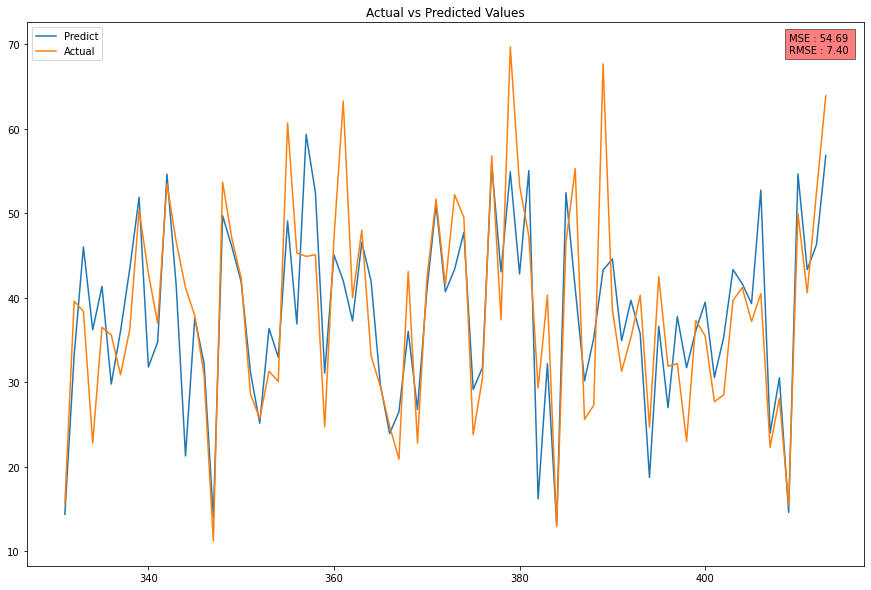

In [ ]:
#Why is our calculated MSE and the RMSE different from the one given by Keras
plt.figure(figsize=(15,10))
plt.plot(predict_df.index.values,predict_df['Predict_Y'],label='Predict')
plt.plot(predict_df.index.values,predict_df['True_Y'],label = 'Actual')
plt.legend(loc="upper left")
plt.title('Actual vs Predicted Values')
plt.text(409,69,f'MSE : {mean_squared_error(y_test, y_predict):.2f} \nRMSE : {mean_squared_error(y_test, y_predict,squared=False):.2f}',
         bbox=dict(facecolor='red', alpha=0.5))